###Figure 2 from Nature Food Clark et al., 2023 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import esmlab
#from ctsm_py import utils
#import segment as sg
import scipy                    
from scipy import signal
import cf_units as cf

# some resources for plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
filedir = '/glade/p/univ/urtg0006/Brendan/clmcrop/yield_landuse/'
savedir = '/glade/p/univ/urtg0006/Brendan/nature_food_pdf_figs/'
y45 = xr.open_dataset(filedir+'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.AVG.clm2.h1.yield.203501-206912.nc')
y4515 = xr.open_dataset(filedir+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.AVG.clm2.h1.yield.203501-207012.nc')
y4505 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-1.0.AVG.clm2.h1.yield.203501-207012.nc')
y4510 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-0.5.AVG.clm2.h1.yield.203501-206912.nc')
y34 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.AVG.clm2.h1.yield.2040-2099.nc')
y3415 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.15C.AVG.clm2.h1.yield.2040-2099.nc')
y3420 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.20C.AVG.clm2.h1.yield.2040-2099.nc')
y85 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.AVG.clm2.h1.yield.2020-2099.nc')
y8515 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.AVG.clm2.h1.yield.2020-2099.nc')
ysol = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6solar-WACCM.AVG.clm2.h1.yield.2020-2099.nc')
ysul = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6sulfur-WACCM.AVG.clm2.h1.yield.2020-2099.nc')

carea45 = y45['area'].sel(crops=0)
#convert km^2 to hectares
carea45 = carea45 * 100
carea34 = y34['area'].sel(crops=0)
carea34 = carea34 * 100
carea85 = y85['area'].sel(crops=0)
carea85 = carea85 * 100

rarea45 = y45['area'].sel(crops=3)
rarea45 = rarea45 * 100
rarea34 = y34['area'].sel(crops=3)
rarea34 = rarea34 * 100
rarea85 = y85['area'].sel(crops=3)
rarea85 = rarea85 * 100

sarea45 = y45['area'].sel(crops=6)
sarea45 = sarea45 * 100
sarea34 = y34['area'].sel(crops=6)
sarea34 = sarea34 * 100
sarea85 = y85['area'].sel(crops=6)
sarea85 = sarea85 * 100

warea45 = y45['area'].sel(crops=9)
warea45 = warea45 * 100
warea34 = y34['area'].sel(crops=9)
warea34 = warea34 * 100
warea85 = y85['area'].sel(crops=9)
warea85 = warea85 * 100

In [3]:
#Production (kilocalories/year) = Yield (tons/hectare/year) × Cropping Area (hectare) × Crop Nutritional Value (kilocalories/ton)
#m=3229581.515
#r=2540120.293
#s=3039072.493
#w=3030000.635
###Maize
#SSP245
c45 = y45['yield'].sel(crops=0)
c45 = (c45 * carea45) * 3229581.515
c4515 = y4515['yield'].sel(crops=0)
c4515 = (c4515 * carea45) * 3229581.515
c4510 = y4510['yield'].sel(crops=0)
c4510 = (c4510 * carea45) * 3229581.515
c4505 = y4505['yield'].sel(crops=0)
c4505 = (c4505 * carea45) * 3229581.515
c45 = c45.sum(dim=['lat','lon'],skipna=True)
c4515 = c4515.sum(dim=['lat','lon'],skipna=True)
c4510 = c4510.sum(dim=['lat','lon'],skipna=True)
c4505 = c4505.sum(dim=['lat','lon'],skipna=True)
#SSP534
c34 = y34['yield'].sel(crops=0)
c34 = (c34 * carea34) * 3229581.515
c3415 = y3415['yield'].sel(crops=0)
c3415 = (c3415 * carea34) * 3229581.515
c3420 = y3420['yield'].sel(crops=0)
c3420 = (c3420 * carea34) * 3229581.515
c34 = c34.sum(dim=['lat','lon'],skipna=True)
c3415 = c3415.sum(dim=['lat','lon'],skipna=True)
c3420 = c3420.sum(dim=['lat','lon'],skipna=True)
#SSP585
c85 = y85['yield'].sel(crops=0)
c85 = (c85 * carea85) * 3229581.515
c8515 = y8515['yield'].sel(crops=0)
c8515 = (c8515 * carea85) * 3229581.515
csol = ysol['yield'].sel(crops=0)
csol = (csol * carea85) * 3229581.515
csul = ysul['yield'].sel(crops=0)
csul = (csul * carea85) * 3229581.515
c85 = c85.sum(dim=['lat','lon'],skipna=True)
c8515 = c8515.sum(dim=['lat','lon'],skipna=True)
csol = csol.sum(dim=['lat','lon'],skipna=True)
csul = csul.sum(dim=['lat','lon'],skipna=True)

###Rice
#SSP245
r45 = y45['yield'].sel(crops=3)
r45 = (r45 * rarea45) * 2540120.293
r4515 = y4515['yield'].sel(crops=3)
r4515 = (r4515 * rarea45) * 2540120.293
r4510 = y4510['yield'].sel(crops=3)
r4510 = (r4510 * rarea45) * 2540120.293
r4505 = y4505['yield'].sel(crops=3)
r4505 = (r4505 * rarea45) * 2540120.293
r45 = r45.sum(dim=['lat','lon'],skipna=True)
r4515 = r4515.sum(dim=['lat','lon'],skipna=True)
r4510 = r4510.sum(dim=['lat','lon'],skipna=True)
r4505 = r4505.sum(dim=['lat','lon'],skipna=True)
#SSP534
r34 = y34['yield'].sel(crops=3)
r34 = (r34 * rarea34) * 2540120.293
r3415 = y3415['yield'].sel(crops=3)
r3415 = (r3415 * rarea34) * 2540120.293
r3420 = y3420['yield'].sel(crops=3)
r3420 = (r3420 * rarea34) * 2540120.293
r34 = r34.sum(dim=['lat','lon'],skipna=True)
r3415 = r3415.sum(dim=['lat','lon'],skipna=True)
r3420 = r3420.sum(dim=['lat','lon'],skipna=True)
#SSP585
r85 = y85['yield'].sel(crops=3)
r85 = (r85 * rarea85) * 2540120.293
r8515 = y8515['yield'].sel(crops=3)
r8515 = (r8515 * rarea85) * 2540120.293
rsol = ysol['yield'].sel(crops=3)
rsol = (rsol * rarea85) * 2540120.293
rsul = ysul['yield'].sel(crops=3)
rsul = (rsul * rarea85) * 2540120.293
r85 = r85.sum(dim=['lat','lon'],skipna=True)
r8515 = r8515.sum(dim=['lat','lon'],skipna=True)
rsol = rsol.sum(dim=['lat','lon'],skipna=True)
rsul = rsul.sum(dim=['lat','lon'],skipna=True)

###SOY
#SSP245
s45 = y45['yield'].sel(crops=6)
s45 = (s45 * sarea45) * 3039072.493
s4515 = y4515['yield'].sel(crops=6)
s4515 = (s4515 * sarea45) * 3039072.493
s4510 = y4510['yield'].sel(crops=6)
s4510 = (s4510 * sarea45) * 3039072.493
s4505 = y4505['yield'].sel(crops=6)
s4505 = (s4505 * sarea45) * 3039072.493
s45 = s45.sum(dim=['lat','lon'])
s4515 = s4515.sum(dim=['lat','lon'],skipna=True)
s4510 = s4510.sum(dim=['lat','lon'],skipna=True)
s4505 = s4505.sum(dim=['lat','lon'],skipna=True)
#SSP534
s34 = y34['yield'].sel(crops=6)
s34 = (s34 * sarea34) * 3039072.493
s3415 = y3415['yield'].sel(crops=6)
s3415 = (s3415 * sarea34) * 3039072.493
s3420 = y3420['yield'].sel(crops=6)
s3420 = (s3420 * sarea34) * 3039072.493
s34 = s34.sum(dim=['lat','lon'],skipna=True)
s3415 = s3415.sum(dim=['lat','lon'],skipna=True)
s3420 = s3420.sum(dim=['lat','lon'],skipna=True)
#SSP585
s85 = y85['yield'].sel(crops=6)
s85 = (s85 * sarea85) * 3039072.493
s8515 = y8515['yield'].sel(crops=6)
s8515 = (s8515 * sarea85) * 3039072.493
ssol = ysol['yield'].sel(crops=6)
ssol = (ssol * sarea85) * 3039072.493
ssul = ysul['yield'].sel(crops=6)
ssul = (ssul * sarea85) * 3039072.493
s85 = s85.sum(dim=['lat','lon'],skipna=True)
s8515 = s8515.sum(dim=['lat','lon'],skipna=True)
ssol = ssol.sum(dim=['lat','lon'],skipna=True)
ssul = ssul.sum(dim=['lat','lon'],skipna=True)

###WHEAT
#SSP245
w45 = y45['yield'].sel(crops=9)
w45 = (w45 * warea45) * 3030000.635
w4515 = y4515['yield'].sel(crops=9)
w4515 = (w4515 * warea45) * 3030000.635
w4510 = y4510['yield'].sel(crops=9)
w4510 = (w4510 * warea45) * 3030000.635
w4505 = y4505['yield'].sel(crops=9)
w4505 = (w4505 * warea45) * 3030000.635
w45 = w45.sum(dim=['lat','lon'])
w4515 = w4515.sum(dim=['lat','lon'],skipna=True)
w4510 = w4510.sum(dim=['lat','lon'],skipna=True)
w4505 = w4505.sum(dim=['lat','lon'],skipna=True)
#SSP534
w34 = y34['yield'].sel(crops=9)
w34 = (w34 * warea34) * 3030000.635
w3415 = y3415['yield'].sel(crops=9)
w3415 = (w3415 * warea34) * 3030000.635
w3420 = y3420['yield'].sel(crops=9)
w3420 = (w3420 * warea34) * 3030000.635
w34 = w34.sum(dim=['lat','lon'],skipna=True)
w3415 = w3415.sum(dim=['lat','lon'],skipna=True)
w3420 = w3420.sum(dim=['lat','lon'],skipna=True)
#SSP585
w85 = y85['yield'].sel(crops=9)
w85 = (w85 * warea85) * 3030000.635
w8515 = y8515['yield'].sel(crops=9)
w8515 = (w8515 * warea85) * 3030000.635
wsol = ysol['yield'].sel(crops=9)
wsol = (wsol * warea85) * 3030000.635
wsul = ysul['yield'].sel(crops=9)
wsul = (wsul * warea85) * 3030000.635
w85 = w85.sum(dim=['lat','lon'],skipna=True)
w8515 = w8515.sum(dim=['lat','lon'],skipna=True)
wsol = wsol.sum(dim=['lat','lon'],skipna=True)
wsul = wsul.sum(dim=['lat','lon'],skipna=True)

In [4]:
tot45 = (c45 + r45 + s45 + w45)
tot4515 = (c4515 + r4515 + s4515 + w4515)
tot4510 = (c4510 + r4510 + s4510 + w4510)
tot4505 = (c4505 + r4505 + s4505 + w4505)
tot34 = (c34 + r34 + s34 + w34)
tot3415 = (c3415 + r3415 + s3415 + w3415)
tot3420 = (c3420 + r3420 + s3420 + w3420)
tot85 = (w85 + r85 + s85 + w85)
tot8515 = (w8515 + r8515 + s8515 + w8515)
totsol = (csol + rsol + ssol + wsol)
totsul = (csul + rsul + ssul + wsul)

In [5]:
p4515 = (tot4515 - tot45) / (tot45)
p4515 = p4515 * 100
p4510 = (tot4510 - tot45) / (tot45)
p4510 = p4510 * 100
p4505 = (tot4505 - tot45) / (tot45)
p4505 = p4505 * 100
p3415 = (tot3415 - tot34) / (tot34)
p3415 = p3415 * 100
p3420 = (tot3420 - tot34) / (tot34)
p3420 = p3420 * 100
p8515 = (tot8515 - tot85) / (tot85)
p8515 = p8515 * 100
psol = (totsol - tot85) / (tot85)
psol = psol * 100
psul = (totsul - tot85) / (tot85)
psul = psul * 100

In [7]:
#MAIZE
cp4515 = (c4515 - c45) / (c45)
cp4515 = cp4515 * 100
cp4515 = cp4515.rolling(time=5, center=True).mean()
cp4515 = cp4515.sel(time=slice('2040', '2070'))
cp4510 = (c4510 - c45) / (c45)
cp4510 = cp4510 * 100
cp4510 = cp4510.rolling(time=5, center=True).mean()
cp4510 = cp4510.sel(time=slice('2040', '2070'))
cp4505 = (c4505 - c45) / (c45)
cp4505 = cp4505 * 100
cp4505 = cp4505.rolling(time=5, center=True).mean()
cp4505 = cp4505.sel(time=slice('2040', '2070'))
cp3415 = (c3415 - c34) / (c34)
cp3415 = cp3415 * 100
cp3415 = cp3415.rolling(time=5, center=True).mean()
cp3415 = cp3415.sel(time=slice('2045', '2100'))
cp3420 = (c3420 - c34) / (c34)
cp3420 = cp3420 * 100
cp3420 = cp3420.rolling(time=5, center=True).mean()
cp3420 = cp3420.sel(time=slice('2045', '2100'))
cp8515 = (c8515 - c85) / (c85)
cp8515 = cp8515 * 100
cp8515 = cp8515.rolling(time=5, center=True).mean()
cp8515 = cp8515.sel(time=slice('2025', '2100'))
cpsol = (csol - c85) / (c85)
cpsol = cpsol * 100
cpsol = cpsol.rolling(time=5, center=True).mean()
cpsol = cpsol.sel(time=slice('2025', '2100'))
cpsul = (csul - c85) / (c85)
cpsul = cpsul * 100
cpsul = cpsul.rolling(time=5, center=True).mean()
cpsul = cpsul.sel(time=slice('2025', '2100'))
#RICE
rp4515 = (r4515 - r45) / (r45)
rp4515 = rp4515 * 100
rp4515 = rp4515.rolling(time=5, center=True).mean()
rp4515 = rp4515.sel(time=slice('2040', '2070'))
rp4510 = (r4510 - r45) / (r45)
rp4510 = rp4510 * 100
rp4510 = rp4510.rolling(time=5, center=True).mean()
rp4510 = rp4510.sel(time=slice('2040', '2070'))
rp4505 = (r4505 - r45) / (r45)
rp4505 = rp4505 * 100
rp4505 = rp4505.rolling(time=5, center=True).mean()
rp4505 = rp4505.sel(time=slice('2040', '2070'))
rp3415 = (r3415 - r34) / (r34)
rp3415 = rp3415 * 100
rp3415 = rp3415.rolling(time=5, center=True).mean()
rp3415 = rp3415.sel(time=slice('2045', '2100'))
rp3420 = (r3420 - r34) / (r34)
rp3420 = rp3420 * 100
rp3420 = rp3420.rolling(time=5, center=True).mean()
rp3420 = rp3420.sel(time=slice('2045', '2100'))
rp8515 = (r8515 - r85) / (r85)
rp8515 = rp8515 * 100
rp8515 = rp8515.rolling(time=5, center=True).mean()
rp8515 = rp8515.sel(time=slice('2025', '2100'))
rpsol = (rsol - r85) / (r85)
rpsol = rpsol * 100
rpsol = rpsol.rolling(time=5, center=True).mean()
rpsol = rpsol.sel(time=slice('2025', '2100'))
rpsul = (rsul - r85) / (r85)
rpsul = rpsul * 100
rpsul = rpsul.rolling(time=5, center=True).mean()
rpsul = rpsul.sel(time=slice('2025', '2100'))
#SOY
sp4515 = (s4515 - s45) / (s45)
sp4515 = sp4515 * 100
sp4515 = sp4515.rolling(time=5, center=True).mean()
sp4515 = sp4515.sel(time=slice('2040', '2070'))
sp4510 = (s4510 - s45) / (s45)
sp4510 = sp4510 * 100
sp4510 = sp4510.rolling(time=5, center=True).mean()
sp4510 = sp4510.sel(time=slice('2040', '2070'))
sp4505 = (s4505 - s45) / (s45)
sp4505 = sp4505 * 100
sp4505 = sp4505.rolling(time=5, center=True).mean()
sp4505 = sp4505.sel(time=slice('2040', '2070'))
sp3415 = (s3415 - s34) / (s34)
sp3415 = sp3415 * 100
sp3415 = sp3415.rolling(time=5, center=True).mean()
sp3415 = sp3415.sel(time=slice('2045', '2100'))
sp3420 = (s3420 - s34) / (s34)
sp3420 = sp3420 * 100
sp3420 = sp3420.rolling(time=5, center=True).mean()
sp3420 = sp3420.sel(time=slice('2045', '2100'))
sp8515 = (s8515 - s85) / (s85)
sp8515 = sp8515 * 100
sp8515 = sp8515.rolling(time=5, center=True).mean()
sp8515 = sp8515.sel(time=slice('2025', '2100'))
spsol = (ssol - s85) / (s85)
spsol = spsol * 100
spsol = spsol.rolling(time=5, center=True).mean()
spsol = spsol.sel(time=slice('2025', '2100'))
spsul = (ssul - s85) / (s85)
spsul = spsul * 100
spsul = spsul.rolling(time=5, center=True).mean()
spsul = spsul.sel(time=slice('2025', '2100'))
#WHEAT
wp4515 = (w4515 - w45) / (w45)
wp4515 = wp4515 * 100
wp4515 = wp4515.rolling(time=5, center=True).mean()
wp4515 = wp4515.sel(time=slice('2040', '2070'))
wp4510 = (w4510 - w45) / (w45)
wp4510 = wp4510 * 100
wp4510 = wp4510.rolling(time=5, center=True).mean()
wp4510 = wp4510.sel(time=slice('2040', '2070'))
wp4505 = (w4505 - w45) / (w45)
wp4505 = wp4505 * 100
wp4505 = wp4505.rolling(time=5, center=True).mean()
wp4505 = wp4505.sel(time=slice('2040', '2070'))
wp3415 = (w3415 - w34) / (w34)
wp3415 = wp3415 * 100
wp3415 = wp3415.rolling(time=5, center=True).mean()
wp3415 = wp3415.sel(time=slice('2045', '2100'))
wp3420 = (w3420 - w34) / (w34)
wp3420 = wp3420 * 100
wp3420 = wp3420.rolling(time=5, center=True).mean()
wp3420 = wp3420.sel(time=slice('2045', '2100'))
wp8515 = (w8515 - w85) / (w85)
wp8515 = wp8515 * 100
wp8515 = wp8515.rolling(time=5, center=True).mean()
wp8515 = wp8515.sel(time=slice('2025', '2100'))
wpsol = (wsol - w85) / (w85)
wpsol = wpsol * 100
wpsol = wpsol.rolling(time=5, center=True).mean()
wpsol = wpsol.sel(time=slice('2025', '2100'))
wpsul = (wsul - w85) / (w85)
wpsul = wpsul * 100
wpsul = wpsul.rolling(time=5, center=True).mean()
wpsul = wpsul.sel(time=slice('2025', '2100'))

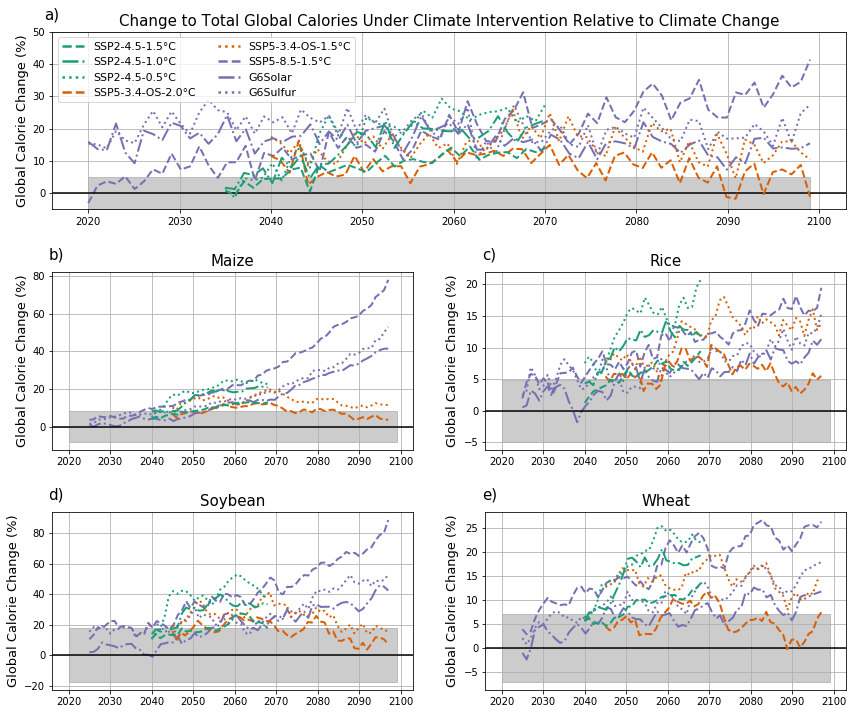

In [8]:
fig = plt.figure()
fig.set_size_inches(12,10)

time45_r = np.linspace(2040, 2070, 30)
time34_r = np.linspace(2045, 2099, 54)
time85_r = np.linspace(2025, 2099, 74)

ax1 = plt.subplot2grid(shape=(3, 2), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid(shape=(3, 2), loc=(1, 0), colspan=1)
ax3 = plt.subplot2grid(shape=(3, 2), loc=(1, 1), rowspan=1)
ax4 = plt.subplot2grid(shape=(3, 2), loc=(2, 0), rowspan=1)
ax5 = plt.subplot2grid(shape=(3, 2), loc=(2, 1), rowspan=1)

ax1.plot(time45,p4515,color ='#1b9e77', linewidth=2, linestyle='dashed', label="SSP2-4.5-1.5°C",zorder=4)
ax1.plot(time45,p4510,color ='#1b9e77', linewidth=2, linestyle='dashdot', label="SSP2-4.5-1.0°C",zorder=4)
ax1.plot(time45,p4505,color ='#1b9e77', linewidth=2, linestyle='dotted', label="SSP2-4.5-0.5°C",zorder=4)
ax1.plot(time34,p3420,color ='#d95f02', linewidth=2, linestyle='dashed', label="SSP5-3.4-OS-2.0°C",zorder=3)
ax1.plot(time34,p3415,color ='#d95f02',linewidth=2,  linestyle='dotted', label="SSP5-3.4-OS-1.5°C",zorder=3)
ax1.plot(time85,p8515,color ='#7570b3', linewidth=2, linestyle='dashed', label="SSP5-8.5-1.5°C",zorder=2)
ax1.plot(time85,psol,color ='#7570b3',linewidth=2, linestyle='dashdot', label="G6Solar",zorder=2)
ax1.plot(time85,psul,color ='#7570b3',linewidth=2, linestyle='dotted',label="G6Sulfur",zorder=2)
ax1.grid(zorder=0)
leg = ax1.legend(loc="upper left",ncol=2,fontsize=11)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.5)
ax1.axhline(y=0, color='k', linestyle='-')
ax1.fill_between(time85, -4.9, 4.9, alpha=0.4,color='gray')
ax1.set_ylabel("Global Calorie Change (%)",fontsize=13)
ax1.set_ylim([-5, 50])
#ax1.set_xlabel("Year",fontsize=11)
ax1.text(-0.01, 1.07, 'a)', transform=ax1.transAxes, size=15)
ax1.set_title('Change to Total Global Calories Under Climate Intervention Relative to Climate Change',fontsize=15)

ax2.plot(time45_r,cp4515,color ='#1b9e77', linewidth=2, linestyle='dashed', label="SSP2-4.5-1.5°C",zorder=4)
ax2.plot(time45_r,cp4510,color ='#1b9e77', linewidth=2, linestyle='dashdot', label="SSP2-4.5-1.0°C",zorder=4)
ax2.plot(time45_r,cp4505,color ='#1b9e77', linewidth=2, linestyle='dotted', label="SSP2-4.5-0.5°C",zorder=4)
ax2.plot(time34_r,cp3420,color ='#d95f02', linewidth=2, linestyle='dashed', label="SSP5-3.4-OS-2.0°C",zorder=3)
ax2.plot(time34_r,cp3415,color ='#d95f02',linewidth=2,  linestyle='dotted', label="SSP5-3.4-OS-1.5°C",zorder=3)
ax2.plot(time85_r,cp8515,color ='#7570b3', linewidth=2, linestyle='dashed', label="SSP5-8.5-1.5°C",zorder=2)
ax2.plot(time85_r,cpsol,color ='#7570b3',linewidth=2, linestyle='dashdot', label="G6Solar",zorder=2)
ax2.plot(time85_r,cpsul,color ='#7570b3',linewidth=2, linestyle='dotted',label="G6Sulfur",zorder=2)
ax2.grid(zorder=0)
ax2.axhline(y=0, color='k', linestyle='-')
ax2.fill_between(time85, -8, 8, alpha=0.4,color='gray')
#ax1.legend(loc="upper left", ncol=2, prop={'size': 7.8})
ax2.set_ylabel("Global Calorie Change (%)", fontsize=13)
#ax2.set_ylim([-10, 80])
ax2.text(-0.01, 1.07, 'b)', transform=ax2.transAxes, size=15)
ax2.set_title("Maize",fontsize=15)

ax3.plot(time45_r,rp4515,color ='#1b9e77', linewidth=2, linestyle='dashed', label="SSP2-4.5-1.5°C",zorder=4)
ax3.plot(time45_r,rp4510,color ='#1b9e77', linewidth=2, linestyle='dashdot', label="SSP2-4.5-1.0°C",zorder=4)
ax3.plot(time45_r,rp4505,color ='#1b9e77', linewidth=2, linestyle='dotted', label="SSP2-4.5-0.5°C",zorder=4)
ax3.plot(time34_r,rp3420,color ='#d95f02', linewidth=2, linestyle='dashed', label="SSP5-3.4-OS-2.0°C",zorder=3)
ax3.plot(time34_r,rp3415,color ='#d95f02',linewidth=2,  linestyle='dotted', label="SSP5-3.4-OS-1.5°C",zorder=3)
ax3.plot(time85_r,rp8515,color ='#7570b3', linewidth=2, linestyle='dashed', label="SSP5-8.5-1.5°C",zorder=2)
ax3.plot(time85_r,rpsol,color ='#7570b3',linewidth=2, linestyle='dashdot', label="G6Solar",zorder=2)
ax3.plot(time85_r,rpsul,color ='#7570b3',linewidth=2, linestyle='dotted',label="G6Sulfur",zorder=2)
ax3.grid(zorder=0)
ax3.fill_between(time85, -4.9, 4.9, alpha=0.4,color='gray')
ax3.axhline(y=0, color='k', linestyle='-')
ax3.set_ylabel("Global Calorie Change (%)", fontsize=13)
ax3.text(-0.01, 1.07, 'c)', transform=ax3.transAxes, size=15)
ax3.set_title("Rice",fontsize=15)

ax4.plot(time45_r,sp4515,color ='#1b9e77', linewidth=2, linestyle='dashed', label="SSP2-4.5-1.5°C",zorder=4)
ax4.plot(time45_r,sp4510,color ='#1b9e77', linewidth=2, linestyle='dashdot', label="SSP2-4.5-1.0°C",zorder=4)
ax4.plot(time45_r,sp4505,color ='#1b9e77', linewidth=2, linestyle='dotted', label="SSP2-4.5-0.5°C",zorder=4)
ax4.plot(time34_r,sp3420,color ='#d95f02', linewidth=2, linestyle='dashed', label="SSP5-3.4-OS-2.0°C",zorder=3)
ax4.plot(time34_r,sp3415,color ='#d95f02',linewidth=2,  linestyle='dotted', label="SSP5-3.4-OS-1.5°C",zorder=3)
ax4.plot(time85_r,sp8515,color ='#7570b3', linewidth=2, linestyle='dashed', label="SSP5-8.5-1.5°C",zorder=2)
ax4.plot(time85_r,spsol,color ='#7570b3',linewidth=2, linestyle='dashdot', label="G6Solar",zorder=2)
ax4.plot(time85_r,spsul,color ='#7570b3',linewidth=2, linestyle='dotted',label="G6Sulfur",zorder=2)
ax4.grid(zorder=0)
ax4.axhline(y=0, color='k', linestyle='-')
ax4.fill_between(time85, -17.5, 17.5, alpha=0.4,color='gray')
ax4.set_ylabel("Global Calorie Change (%)", fontsize=13)
ax4.text(-0.01, 1.07, 'd)', transform=ax4.transAxes, size=15)
ax4.set_title("Soybean",fontsize=15)

ax5.plot(time45_r,wp4515,color ='#1b9e77', linewidth=2, linestyle='dashed', label="SSP2-4.5-1.5°C",zorder=4)
ax5.plot(time45_r,wp4510,color ='#1b9e77', linewidth=2, linestyle='dashdot', label="SSP2-4.5-1.0°C",zorder=4)
ax5.plot(time45_r,wp4505,color ='#1b9e77', linewidth=2, linestyle='dotted', label="SSP2-4.5-0.5°C",zorder=4)
ax5.plot(time34_r,wp3420,color ='#d95f02', linewidth=2, linestyle='dashed', label="SSP5-3.4-OS-2.0°C",zorder=3)
ax5.plot(time34_r,wp3415,color ='#d95f02',linewidth=2,  linestyle='dotted', label="SSP5-3.4-OS-1.5°C",zorder=3)
ax5.plot(time85_r,wp8515,color ='#7570b3', linewidth=2, linestyle='dashed', label="SSP5-8.5-1.5°C",zorder=2)
ax5.plot(time85_r,wpsol,color ='#7570b3',linewidth=2, linestyle='dashdot', label="G6Solar",zorder=2)
ax5.plot(time85_r,wpsul,color ='#7570b3',linewidth=2, linestyle='dotted',label="G6Sulfur",zorder=2)
ax5.grid(zorder=0)
ax5.axhline(y=0, color='k', linestyle='-')
ax5.fill_between(time85, -7, 7, alpha=0.4,color='gray')
ax5.set_ylabel("Global Calorie Change (%)", fontsize=13)
ax5.text(-0.01, 1.07, 'e)', transform=ax5.transAxes, size=15)
ax5.set_title("Wheat",fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.2,hspace = 0.35)
#fig.suptitle('Change to Global Calories Under Climate Intervention Relative to Climate Change',fontsize=12,y=0.97)
#plt.savefig(savedir+'Tot+indv_calpchange_landuse.png', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )

In [9]:
p8515 = p8515.sel(time=slice('2060', '2070'))
p8515m = p8515.mean()
p8515m

<xarray.DataArray ()>
array(22.285782)

In [10]:
p4505 = p4505.sel(time=slice('2060', '2070'))
p4505m = p4505.mean()
p4505m

<xarray.DataArray ()>
array(24.455984)

In [11]:
p4510 = p4510.sel(time=slice('2060', '2070'))
p4510m = p4510.mean()
p4510m

<xarray.DataArray ()>
array(19.656406)

In [12]:
p4515 = p4515.sel(time=slice('2060', '2070'))
p4515m = p4515.mean()
p4515m

<xarray.DataArray ()>
array(12.472599)

In [13]:
p3415 = p3415.sel(time=slice('2060', '2070'))
p3415m = p3415.mean()
p3415m

<xarray.DataArray ()>
array(17.797303)

In [14]:
p3420 = p3420.sel(time=slice('2060', '2070'))
p3420m = p3420.mean()
p3420m

<xarray.DataArray ()>
array(12.275769)

In [15]:
psol = psol.sel(time=slice('2060', '2070'))
psolm = psol.mean()
psolm

<xarray.DataArray ()>
array(16.332881)

In [16]:
psul = psul.sel(time=slice('2060', '2070'))
psulm = psul.mean()
psulm

<xarray.DataArray ()>
array(18.720902)